In [2]:
import numpy as np
from IPython.display import display, Image
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

### 1a Questão: 
Um prisioneiro está preso em uma cela com 3 portas.
A primeira porta leva a um túnel que, após 8 dias, retorna ao ponto inicial. A segunda porta leva a um túnel que, após 6 dias, leva à liberdade. A terceira porta leva a um túnel que, após 10 dias, retorna ao ponto inicial.


#### a) (Sem memória) 

Suponha que o prisioneiro sempre escolhe as portas 1, 2 e 3 com probabilidades 1/3, 1/3 e 1/3 respectivamente, e seja X o número de dias até o prisioneiro alcançar a liberdade. Determine E(X) e Var(X)

#### R.: 
Seja N uma variável aleatória que indica a porta escolhida. Como para as portas 1 e 3, se escolhidas, retornamos ao ponto inicial, temos que:

$E[X | N = 1] = 8 + E[X]$ \
$E[X | N = 2] = 6$ \
$E[X | N = 3] = 10 + E[X]$ 

Portanto o valor esperado de X, $E[X]$ é:

$E[X] = \frac{1}{3}*(8 + E[X]) + \frac{1}{3}*6 + \frac{1}{3}*(10 + E[X]) = \frac{24}{3} + \frac{2E[X]}{3} \implies E[X] = 24$

e

$Var(X) = E[X^2] - E[X]^2$

$E[X^2 | N = 1] = E[(8 + X)^2] = 64 + 16E[X] + E[X^2] = 64 + 16*24 + E[X]^2 \implies 448 + E[X^2]$ \
$E[X^2 | N = 2] = 36$ \
$E[X^2 | N = 3] = E[(10 + X)^2] = 100 + 20E[X] + E[X^2] = 100 + 20*24 + E[X^2] \implies 580 + E[X^2]$

$\implies E[X^2] = \frac{1}{3}*(448 + E[X^2]) + \frac{1}{3}*(36) + \frac{1}{3}*(580 + E[X^2]) = \frac{1}{3}*(1064 + 2E[X^2]) \implies E[X^2] = 1064$ \
$\implies VAR(X) = 1064 - (24)^2 = 488$ 

#### a) (Com memória) 
Repita o item a), assumindo agora que o prisioneiro é igualmente provável de escolher uma das portas que ele não tenha escolhido anteriormente.

#### R.: 
Seja N uma variável aleatória que indica a porta escolhida. Como para as portas 1 e 3, se escolhidas, retornamos ao ponto inicial mas nesse caso, não são selecionadas novamente, temos que:

$E[X | N = 1] = 8 + \frac{1}{2}*(6) + \frac{1}{2}*(10 + 6) = 19$ \
$E[X | N = 2] = 6$ \
$E[X | N = 3] = 10 + \frac{1}{2}*(6) + \frac{1}{2}*(8 + 6) = 20$ 

Portanto o valor esperado de X, $E[X]$ é:

$E[X] = \frac{1}{3}*(19) + \frac{1}{3}*6 + \frac{1}{3}*(20) = 15$

e

$Var(X) = E[X^2] - E[X]^2$

Para calcular $E[X^2]$, temos:

$E[X^2 | N = 2] = 36$

$E[X^2 | N = 1] = E[(8 + X_1)^2] = E[64 + 16X_1 + X_1^2] = 64 + 16E[X_1] + E[X_1^2]$ \
onde \
$E[X_1] =  \frac{1}{2}*6 + \frac{1}{2}*(10 + 6) = 11$ \
$E[X_1^2] = \frac{1}{2}*(10^2 + 6^2) = 68$ \
$\implies E[X^2 | N = 1] = 64 + 16*11 + 68 = 308$

e

$E[X^2 | N = 3] = E[(10 + X_3)^2] = E[100 + 20X_3 + X_3^2] = 100 + 20E[X_3] + E[X_3^2]$ \
onde \
$E[X_3] =  \frac{1}{2}*(6) + \frac{1}{2}*(8 + 6) = 10$ \
$E[X_3^2] = \frac{1}{2}*(8^2 + 6^2) = 50$ \
$\implies E[X^2 | N = 3] = 100 + 20*10 + 50 = 350$

portanto

$E[X^2] = \frac{1}{3}(36 + 308 + 350) = \frac{694}{3}$ \
$VAR(X) = \frac{694}{3} - (15)^2 = \frac{19}{3} = 6.33$




### 2a Questão: 
Uma moeda com probabilidade p = 1/4 de dar cara é jogada até que ocorram 2 caras consecutivas. Seja N o número de jogadas até que isso ocorra. Determine o valor esperado E(N).

In [32]:
P = np.matrix([[3/4, 1/4, 0],
               [3/4, 0, 1/4],
               [0, 0, 1]])

T= np.matrix([[3/4, 1/4],
               [3/4, 0]])

(np.identity(2)-T)**-1*np.array([[1,1]]).T

matrix([[20.000],
        [16.000]])

R.: Podemos definir o sistema para uma variável X, sendo X o número de caras consecutivas, como uma cadeia de markov com matriz de transição P, já na forma canônica:

In [33]:
#display(Image(filename="./prob/markov2.png", height=600, width=600))

$
P = 
\left(\begin{array}{cc}
3/4 & 1/4 & 0\\
3/4 & 0 & 1/4\\
0 & 0 & 1
\end{array}\right)
$

do tipo

$
P = 
\left(\begin{array}{c|c} 
T & A\\
\hline
0 & I
\end{array}\right)
$

Onde Q é a matrix dos estados transientes

$
T = 
\left(\begin{array}{cc} 
3/4 & 1/4\\
3/4 & 0\\
\end{array}\right)
$

N, chamada de matrix fundamental de P, é definida por $N = (I - T)^{-1}$, :

$
N = 
\left(\begin{array}{cc} 
16 & 4\\
12 & 4\\
\end{array}\right)
$

E o número de passos dados para os estados absorventes (nesse caso apenas o último) a partir de cada estado transiente $i$ é a $i_{th}$ linha de $N*{1}$, onde $1$ é um vetor unitário $i_\chi1$

Portanto,
$$
\left(\begin{array}{cc} 
16 & 4\\
12 & 4\\
\end{array}\right)*
\left(\begin{array}{cc} 
1\\
1\\
\end{array}\right)=
\left(\begin{array}{cc} 
20\\
16\\
\end{array}\right)
$$

e 

$E[N] = 20$

### 3a Questão: 
Considere um jogo em que o jogador, a cada partida, perde 1 real com probabilidade 2/3, e ganha 2 reais com probabilidade 1/3. Suponha que o jogador comece com 2 reais, e que ele
pára de jogar se quebrar ou atingir pelo menos 4 reais.

#### a) Escreva o diagrama de Markov e determine a matriz de transição da cadeia de Markov.
#### R.:
Já na forma canônica, temos os estados 1, 2 e 3 (representando o montante do jogador em determinado momento), nas primeiras tres linhas e colunas, como estados transientes, e os montantes 0, 4 e 5 como estados absorventes, nas linhas e colunas 4, 5, 6, respectivamente
$$
P = 
\left(\begin{array}{ccc|ccc} 
0 & 0 & 1/3 & 2/3 & 0 & 0\\
2/3 & 0 & 0 & 0 & 1/3 & 0\\
0 & 2/3 & 0 & 0 & 0 & 1/3\\
\hline
0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 1\\
\end{array}\right)
$$

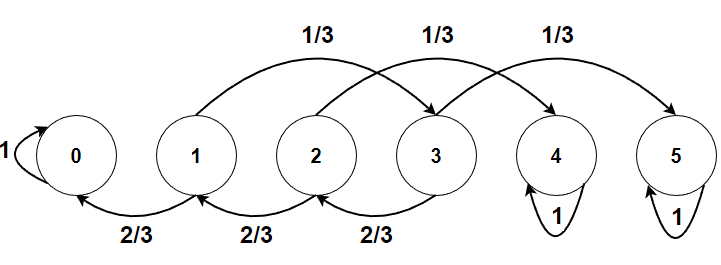

In [42]:
display(Image(filename="./prob/markov3a.png", height=600, width=600))

#### b) Qual é a probabilidade de que existam pelo menos 4 partidas?
#### R.: 

A probabilidade de que existam ao menos 4 partidas é dada pela soma da probabilidade dos estados transientes após 3 partidas.

Dado um vetor de estado inicial $I_0 = [0, 1, 0, 0, 0, 0]'$, a probabilidade de cada estado após $k$ jogadas é dado por $P_k = I_0*P^k$


In [37]:
P = np.matrix([[0, 0, 1/3, 2/3, 0, 0],
               [2/3, 0, 0, 0, 1/3, 0],
               [0, 2/3, 0, 0, 0, 1/3],
               [0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],])

T = np.matrix([[0, 0, 1/3],
               [2/3, 0, 0],
               [0, 2/3, 0]])

A = np.matrix([[2/3, 0, 0],
               [0, 1/3, 0],
               [0, 0, 1/3]])

i = np.array([[0, 1, 0, 0, 0, 0]])
i*P**3

matrix([[0.000, 0.148, 0.000, 0.444, 0.333, 0.074]])

Então

$$
P_3 = I_0*P^3 = 
\left(\begin{array}{c} 
0\\ 
0.148\\ 
0\\
\hline
0.444\\ 
0.333\\
0.074\\
\end{array}\right)
$$

Ou seja, há uma probabilidade de 14.8% de haver uma próxima partida a partir da 3a partida

#### c)  Qual é a probabilidade do jogador sair vencedor (ou seja, a fortuna do jogador atingir 4 reais ou mais)?
#### R.: 

A probabilidade é dada pelo regime permanente do sistema,


In [38]:
from tabulate import tabulate
r = (np.identity(3)-T)**-1*A
print(tabulate(r))      
1 - 0.522

---------------------
[[0.783 0.087 0.130]]
[[0.522 0.391 0.087]]
[[0.348 0.261 0.391]]
---------------------


0.478

#### c) Qual é o valor esperado do número de jogadas até o jogo terminar (com o jogador ganhando ou perdendo) ?

In [41]:
(np.identity(3)-T)**-1*np.array([[1,1,1]]).T

matrix([[1.826],
        [2.217],
        [2.478]])

2.217

#### 4 uponha que uma empresa financeira classifique os seus estados de processamento
de transações de 0 a 5 de acordo com o tempo necessário para a sua liquidação, segundo o
modelo:Estado 0: transação está sem atraso; Estado 1: transação está com 1 dia de atraso;
Estado 2: transação está com 2 dias de atraso; Estado 3: transação está com 3 dias de atraso;
Estado 4: transação liquidada sem pagamento de multa; Estado 5: transação liquidada com
pagamento de multa. A instituição tem uma série de dados no tempo razoável, e esses dados
indicam que a cadeia de Markov possui a seguinte matriz de transição P é:

In [58]:
import numpy as np

P = np.matrix([[0, 0.7, 0, 0, 0.3, 0],
              [0, 0, 0.7, 0, 0.3, 0],
              [0, 0, 0, 0.5, 0.5, 0],
              [0, 0, 0, 0, 0.9, 0.1],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1]])

T = np.matrix([[0, 0.7, 0, 0],
              [0, 0, 0.7, 0],
              [0, 0, 0, 0.5],
              [0, 0, 0, 0]])

A = np.matrix([[0.3, 0],
               [0.3, 0],
               [0.5, 0],
               [0.9, 0.1]])

In [59]:
print(tabulate(P))

---------------------------------------
[[0.000 0.700 0.000 0.000 0.300 0.000]]
[[0.000 0.000 0.700 0.000 0.300 0.000]]
[[0.000 0.000 0.000 0.500 0.500 0.000]]
[[0.000 0.000 0.000 0.000 0.900 0.100]]
[[0.000 0.000 0.000 0.000 1.000 0.000]]
[[0.000 0.000 0.000 0.000 0.000 1.000]]
---------------------------------------


In [61]:
r = (np.identity(4)-T)**-1*A
r

matrix([[0.976, 0.024],
        [0.965, 0.035],
        [0.950, 0.050],
        [0.900, 0.100]])

Se considerarmos que uma transação sempre começa do estado sem atraso (0), então a probabilidade é 2.4%